Attribute Information: (class attribute has been moved to last column)
   #  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [72]:
col = ['id', 'Clump Thickness', 'Uniformity of Cell Size', 
       'Uniformity of Cell Shape', 'Marginal Adhesion', 
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class']
df = pd.read_csv("breast-cancer-wisconsin.data.csv", names=col,
                 header=None)
df.iloc[:3]

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2


In [63]:
df.columns[1:10]

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses'],
      dtype='object')

# Data Preprocessing

In [33]:
#np.where(df.isnull())

In [34]:
#df.describe()

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                             699 non-null int64
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [36]:
#df['Bare Nuclei'].describe()

In [54]:
df['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
0      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

## Assigning the 0 to '?' in Bare Nuclei Column

In [73]:
bare_index = df[df['Bare Nuclei'] == '?'].index
b = np.array(bare_index)

In [74]:
df.loc[b,'Bare Nuclei'] = 0

In [75]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

## 0.0 is assign to 2 class & 0.1 is assign to 4 class

In [76]:
df['Class'] = df['Class'] / 2 - 1

In [57]:
df['Class'].value_counts()

0.0    458
1.0    241
Name: Class, dtype: int64

# Get the Features and Target variable

In [77]:
features = df[['Clump Thickness', 'Uniformity of Cell Size', 
       'Uniformity of Cell Shape', 'Marginal Adhesion', 
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses']]
target = df['Class']

## Standard Scaler

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
scaler = StandardScaler()

In [80]:
scaler_feature = scaler.fit_transform(features)

Scaled value Assign to DataFrame

In [81]:
df_feature = pd.DataFrame(scaler_feature,columns=df.columns[1:10])

In [65]:
df_feature.iloc[1:3]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
1,0.206936,0.283845,0.266875,0.768621,1.710106,1.796673,-0.179662,-0.284112,-0.343912
2,-0.503866,-0.699995,-0.743299,-0.633247,-0.549561,-0.402275,-0.179662,-0.611825,-0.343912


In [82]:
X = df_feature
y = target

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [85]:
from sklearn.neighbors import KNeighborsClassifier

## Applying ELBOW Method

In [86]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))

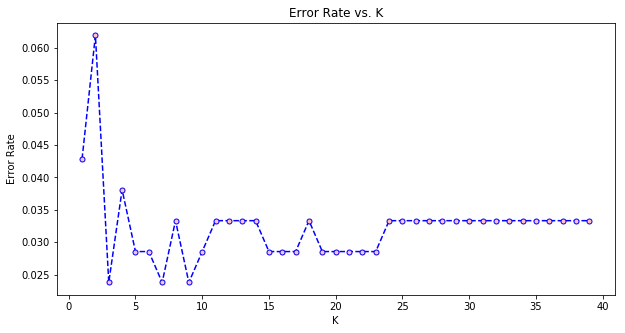

In [87]:
plt.figure(figsize=(10,5))
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. K')
plt.plot(range(1,40),error_rate,color='blue',marker='o',markerfacecolor='pink',markersize=5,ls='--')

In [89]:
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [91]:
from sklearn.metrics import classification_report,confusion_matrix

In [92]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

        0.0       0.97      0.98      0.98       143
        1.0       0.95      0.94      0.95        67

avg / total       0.97      0.97      0.97       210



In [96]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[140   3]
 [  4  63]]


In [94]:
from sklearn.metrics import accuracy_score

In [95]:
print('Accuracy Score :',accuracy_score(y_test,y_pred)) # function 

Accuracy Score : 0.9666666666666667


In [98]:
#own calculator
total = sum(sum(cm))
accuracy = (cm[0,0] + cm[1,1])/total
print("Accuracy : ",accuracy)

Accuracy :  0.9666666666666667


In [97]:
sensitivity = cm[0,0] / (cm[0,0] + cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.9790209790209791
Specificity :  0.9790209790209791
